In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
df = pd.read_csv('active_User_per_30_days.csv')

C:\Windows\Temp\ipykernel_7592\2140576529.py:1: DtypeWarning: Columns (37,38,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('active_User_per_30_days.csv')


In [3]:
df.head()

,Unnamed: 0.2,Unnamed: 0.1,Datetime,Tweet_id,Tweet_content,Tweet_reply_count,Tweet_retweet_count,Tweet_like_count,Tweet_quote_count,Tweet_language,...,authority_cat,care_cat,fairness_cat,purity_cat,loyalty_cat,7day_cut,14day_cut,30day_cut,60day_cut,90day_cut
0,6,6,2022-02-22,1496098801152512002,putins war ukraine russia crisis ukraina ...,0,0,1,0,en,...,Non,Harm,Non,Non,Non,"[2022-02-22, 2022-03-01)","[2022-02-22, 2022-03-08)","[2022-02-22, 2022-03-24)","[2022-02-22, 2022-04-23)","[2022-02-22, 2022-05-23)"
1,7,7,2022-02-22,1496099780912881665,Proud moment for indiaTwo young shining stars...,0,0,1,0,en,...,Non,Care,Non,Non,Non,"[2022-02-22, 2022-03-01)","[2022-02-22, 2022-03-08)","[2022-02-22, 2022-03-24)","[2022-02-22, 2022-04-23)","[2022-02-22, 2022-05-23)"
2,12,12,2022-02-22,1496103001903501319,Russia vs Ukraine War Update: Germany halts No...,1,0,1,0,en,...,Non,Harm,Non,Non,Non,"[2022-02-22, 2022-03-01)","[2022-02-22, 2022-03-08)","[2022-02-22, 2022-03-24)","[2022-02-22, 2022-04-23)","[2022-02-22, 2022-05-23)"
3,26,26,2022-02-22,1496107122718695424,putins war :Interesting details on other terr...,0,0,1,0,en,...,Non,Harm,Non,Non,Non,"[2022-02-22, 2022-03-01)","[2022-02-22, 2022-03-08)","[2022-02-22, 2022-03-24)","[2022-02-22, 2022-04-23)","[2022-02-22, 2022-05-23)"
4,27,27,2022-02-22,1496107229929476105,"criminals in russia, iran, syria!are the w...",0,0,3,0,en,...,Non,Non,Non,Degradation,Mixed,"[2022-02-22, 2022-03-01)","[2022-02-22, 2022-03-08)","[2022-02-22, 2022-03-24)","[2022-02-22, 2022-04-23)","[2022-02-22, 2022-05-23)"


In [4]:
df.columns

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Datetime', 'Tweet_id', 'Tweet_content',
       'Tweet_reply_count', 'Tweet_retweet_count', 'Tweet_like_count',
       'Tweet_quote_count', 'Tweet_language', 'Tweet_place', 'Tweet_hashtags',
       'Username', 'User_id', 'User_followers_count', 'User_friends_count',
       'User_statuses_count', 'User_favourites_count', 'User_listed_count',
       'User_media_count', 'User_location', 'Tweet_isRT', 'results', 'hateful',
       'aggressive', 'HorA', 'care', 'fairness', 'loyalty', 'authority',
       'purity', 'Unnamed: 0', 'authority_cat', 'care_cat', 'fairness_cat',
       'purity_cat', 'loyalty_cat', '7day_cut', '14day_cut', '30day_cut',
       '60day_cut', '90day_cut'],
      dtype='object')

In [4]:
df = df[['Datetime', 'Tweet_id', 'Tweet_content',
       'Tweet_reply_count', 'Tweet_retweet_count', 'Tweet_like_count',
       'Tweet_quote_count', 'Tweet_hashtags',
       'Username', 'User_id', 'User_followers_count', 'User_friends_count',
       'User_statuses_count', 'User_favourites_count', 'User_listed_count',
       'User_media_count', 'HorA', 'care', 'fairness', 'loyalty', 'authority',
       'purity','authority_cat', 'care_cat', 'fairness_cat',
       'purity_cat', 'loyalty_cat','30day_cut']]

In [5]:
df.head()

,Datetime,Tweet_id,Tweet_content,Tweet_reply_count,Tweet_retweet_count,Tweet_like_count,Tweet_quote_count,Tweet_hashtags,Username,User_id,...,fairness,loyalty,authority,purity,authority_cat,care_cat,fairness_cat,purity_cat,loyalty_cat,30day_cut
0,2022-02-22,1496098801152512002,putins war ukraine russia crisis ukraina ...,0,0,1,0,"['PutinsWar', 'UkraineRussiaCrisis', 'Ukraina'...",anyidea,23024287,...,0.0,0.00,0.0,0.0,Non,Harm,Non,Non,Non,"[2022-02-22, 2022-03-24)"
1,2022-02-22,1496099780912881665,Proud moment for indiaTwo young shining stars...,0,0,1,0,"['India', 'Kashmir', 'India', 'Dubai', 'COVID1...",AhmedFidous,1334012207286325249,...,0.0,0.00,0.0,0.0,Non,Care,Non,Non,Non,"[2022-02-22, 2022-03-24)"
2,2022-02-22,1496103001903501319,Russia vs Ukraine War Update: Germany halts No...,1,0,1,0,"['Ukraine', 'UkraineRussiaCrisis', 'UkraineCon...",prime_scoop,1486283164846747649,...,0.0,0.00,0.0,0.0,Non,Harm,Non,Non,Non,"[2022-02-22, 2022-03-24)"
3,2022-02-22,1496107122718695424,putins war :Interesting details on other terr...,0,0,1,0,"['PutinsWar', 'SatansSpeech', 'PutinSpeech', '...",anyidea,23024287,...,0.0,0.00,0.0,0.0,Non,Harm,Non,Non,Non,"[2022-02-22, 2022-03-24)"
4,2022-02-22,1496107229929476105,"criminals in russia, iran, syria!are the w...",0,0,3,0,"['criminals', 'Russia', 'Iran', 'Syria', 'Cowa...",Basel_Saneeb,1588526876,...,0.0,3.25,0.0,3.0,Non,Non,Non,Degradation,Mixed,"[2022-02-22, 2022-03-24)"


In [6]:
import nltk
# 创建停用词列表，使用 nltk 自带的英文停用词
stopwords = nltk.corpus.stopwords.words('english')

# 对文本进行分词、词干化和去停用词，并保存到新的列中
df["Tweet_content_clean"] = df["Tweet_content"].apply(lambda x: " ".join([nltk.stem.PorterStemmer().stem(word) for word in nltk.word_tokenize(x.lower()) if word not in stopwords]))

KeyboardInterrupt: 

In [49]:
df.head()

,Datetime,Tweet_id,Tweet_content,Tweet_reply_count,Tweet_retweet_count,Tweet_like_count,Tweet_quote_count,Tweet_hashtags,Username,User_id,...,loyalty,authority,purity,authority_cat,care_cat,fairness_cat,purity_cat,loyalty_cat,30day_cut,Tweet_content_clean
0,2022-02-22,1496098801152512002,putins war ukraine russia crisis ukraina ...,0,0,1,0,"['PutinsWar', 'UkraineRussiaCrisis', 'Ukraina'...",anyidea,23024287,...,0.0000,0.0,0.0,Non,Harm,Non,Non,Non,0,putin war ukrain russia crisi ukraina ukrain c...
1,2022-02-22,1496099780912881665,Proud moment for indiaTwo young shining stars...,0,0,1,0,"['India', 'Kashmir', 'India', 'Dubai', 'COVID1...",AhmedFidous,1334012207286325249,...,0.0000,0.0,0.0,Non,Care,Non,Non,Non,0,proud moment indiatwo young shine star saleem ...
2,2022-02-22,1496103001903501319,Russia vs Ukraine War Update: Germany halts No...,1,0,1,0,"['Ukraine', 'UkraineRussiaCrisis', 'UkraineCon...",prime_scoop,1486283164846747649,...,0.0000,0.0,0.0,Non,Harm,Non,Non,Non,0,russia vs ukrain war updat : germani halt nord...
3,2022-02-22,1496107122718695424,putins war :Interesting details on other terr...,0,0,1,0,"['PutinsWar', 'SatansSpeech', 'PutinSpeech', '...",anyidea,23024287,...,0.0000,0.0,0.0,Non,Harm,Non,Non,Non,0,putin war : interest detail territori conquer ...
4,2022-02-22,1496107229929476105,"criminals in russia, iran, syria!are the w...",0,0,3,0,"['criminals', 'Russia', 'Iran', 'Syria', 'Cowa...",Basel_Saneeb,1588526876,...,-0.4375,0.0,-0.5,Non,Non,Non,Degradation,Mixed,0,"crimin russia , iran , syria ! world 's dirtie..."


In [66]:
df['Tweet_content_clean'][0]

['putin',
 'war',
 'ukrain',
 'russia',
 'crisi',
 'ukraina',
 'ukrain',
 'crisi',
 'ukrain',
 'volodymyr',
 'zelenski',
 '',
 'vladimir',
 'putin',
 'last',
 'warn',
 '',
 '',
 'url']

In [52]:
import string

def remove_punctuation(text):
    """
    去除标点符号
    """
    return text.translate(str.maketrans("", "", string.punctuation))

df["Tweet_content_clean"] = df["Tweet_content_clean"].apply(lambda x: x.split())
df["Tweet_content_clean"] = df["Tweet_content_clean"].apply(lambda x: [remove_punctuation(word) for word in x])

In [55]:
df["url_num"] = df["Tweet_content_clean"].apply(lambda x: x.count("url"))

In [64]:
df["emoji_num"] = df["Tweet_content_clean"].apply(lambda x: x.count("emoji"))

In [87]:
df.Tweet_hashtags.fillna("", inplace=True)

In [89]:
df["Tweet_hashtags"] = df["Tweet_hashtags"].apply(lambda x: literal_eval(x))

SyntaxError: unexpected EOF while parsing (<unknown>, line 0)

In [100]:
#用户的影响力评分为它的粉丝数除以关注数，这里将关注数+1以避免为0
df['User_infuluence_score'] =  df.apply(lambda row: row['User_followers_count']/(row['User_friends_count']+1), axis=1)

In [ ]:
df.to_csv('H:/课程/毕业论文/active_User_per_30_days_processed.csv')

In [2]:
df = pd.read_csv('H:/课程/毕业论文/active_User_per_30_days_processed.csv')

In [3]:
df.head()

,Unnamed: 0,Datetime,Tweet_id,Tweet_content,Tweet_reply_count,Tweet_retweet_count,Tweet_like_count,Tweet_quote_count,Tweet_hashtags,Username,...,care_cat,fairness_cat,purity_cat,loyalty_cat,30day_cut,Tweet_content_clean,url_num,at_num,emoji_num,User_infuluence_score
0,0,2022-02-22,1496098801152512002,putins war ukraine russia crisis ukraina ...,0,0,1,0,"['PutinsWar', 'UkraineRussiaCrisis', 'Ukraina'...",anyidea,...,Harm,Non,Non,Non,0,"['putin', 'war', 'ukrain', 'russia', 'crisi', ...",1,0,0,1.155039
1,1,2022-02-22,1496099780912881665,Proud moment for indiaTwo young shining stars...,0,0,1,0,"['India', 'Kashmir', 'India', 'Dubai', 'COVID1...",AhmedFidous,...,Care,Non,Non,Non,0,"['proud', 'moment', 'indiatwo', 'young', 'shin...",1,0,0,0.273474
2,2,2022-02-22,1496103001903501319,Russia vs Ukraine War Update: Germany halts No...,1,0,1,0,"['Ukraine', 'UkraineRussiaCrisis', 'UkraineCon...",prime_scoop,...,Harm,Non,Non,Non,0,"['russia', 'vs', 'ukrain', 'war', 'updat', '',...",1,0,0,7.575000
3,3,2022-02-22,1496107122718695424,putins war :Interesting details on other terr...,0,0,1,0,"['PutinsWar', 'SatansSpeech', 'PutinSpeech', '...",anyidea,...,Harm,Non,Non,Non,0,"['putin', 'war', '', 'interest', 'detail', 'te...",1,0,0,1.155039
4,4,2022-02-22,1496107229929476105,"criminals in russia, iran, syria!are the w...",0,0,3,0,"['criminals', 'Russia', 'Iran', 'Syria', 'Cowa...",Basel_Saneeb,...,Non,Non,Degradation,Mixed,0,"['crimin', 'russia', '', 'iran', '', 'syria', ...",1,0,4,2.186667


In [4]:
df.columns

Index(['Unnamed: 0', 'Datetime', 'Tweet_id', 'Tweet_content',
       'Tweet_reply_count', 'Tweet_retweet_count', 'Tweet_like_count',
       'Tweet_quote_count', 'Tweet_hashtags', 'Username', 'User_id',
       'User_followers_count', 'User_friends_count', 'User_statuses_count',
       'User_favourites_count', 'User_listed_count', 'User_media_count',
       'HorA', 'care', 'fairness', 'loyalty', 'authority', 'purity',
       'authority_cat', 'care_cat', 'fairness_cat', 'purity_cat',
       'loyalty_cat', '30day_cut', 'Tweet_content_clean', 'url_num', 'at_num',
       'emoji_num', 'User_infuluence_score'],
      dtype='object')

In [5]:
df['Tweet_be_retweeted'] = df['Tweet_retweet_count'].apply(lambda x: 0+(x>0))

In [6]:
df.Tweet_be_retweeted.value_counts()

0    1824626
1     906127
Name: Tweet_be_retweeted, dtype: int64

In [7]:
df.Tweet_hashtags[0]

"['PutinsWar', 'UkraineRussiaCrisis', 'Ukraina', 'UkraineCrisis', 'Ukraine', 'VolodymyrZelensky', 'VladimirPutin']"

In [8]:
df.emoji_num.value_counts()

0      2230916
2       226844
4       104025
6        71847
8        32701
        ...   
158          1
132          1
152          1
9            1
270          1
Name: emoji_num, Length: 85, dtype: int64

In [9]:
df[['authority']].describe()

,authority
count,2.730753e+06
mean,2.904747e-02
std,1.911221e-01
min,-9.500000e-01
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,9.500000e-01


In [10]:
df['30day_cut'].value_counts()

 0    788454
 1    511543
 2    382645
 3    285458
 4    254926
 5    232124
 6    164647
-1    110956
Name: 30day_cut, dtype: int64

In [11]:
df.pivot_table(index='User_id', values='Tweet_id', aggfunc=len).sort_values(by = 'Tweet_id', ascending=False)

,Tweet_id
User_id,
29123084,34002
1499763123603050497,23260
88196314,20033
1452730505787551750,19374
21729540,14035
...,...
1327444965216153600,8
1430843665484820483,7
2462990324,7


In [12]:
df.pivot_table(index='User_id', values=['care','fairness','purity','authority',
                                       'loyalty'], aggfunc=np.mean).sort_values(by = 'care', ascending=False)

,authority,care,fairness,loyalty,purity
User_id,,,,,
1112896007774371840,0.000000,0.900000,0.000000,0.000000,0.000000
1108807484,0.000000,0.849129,0.000000,0.005597,0.765392
115088543,0.000000,0.819298,0.000000,0.750000,-0.687500
117000756,-0.014987,0.766166,0.000000,0.727376,-0.014307
336733017,0.000000,0.750000,0.000000,0.000000,0.156250
...,...,...,...,...,...
1369308747508690952,0.000000,-0.833333,0.000000,0.000000,0.000000
1496698206477950977,0.000000,-0.833333,0.000000,0.000000,0.000000
264059491,0.000000,-0.833333,0.000000,0.000000,0.000000


由于0代表不包含道德，1代表Vice，9代表Virtue，0到1之间是截断的并且不均匀的，所以应该把数据重新处理一下。考虑到不包含道德和道德中立概念相近，把1处理为-1，9处理为1，0继续保留为0。

In [10]:
def normalize_data(data):
    if data ==0:
        return 0
    else:
        return (data-1)/4-1

In [11]:
df.head()

,Datetime,Tweet_id,Tweet_content,Tweet_reply_count,Tweet_retweet_count,Tweet_like_count,Tweet_quote_count,Tweet_hashtags,Username,User_id,...,fairness,loyalty,authority,purity,authority_cat,care_cat,fairness_cat,purity_cat,loyalty_cat,30day_cut
0,2022-02-22,1496098801152512002,putins war ukraine russia crisis ukraina ...,0,0,1,0,"['PutinsWar', 'UkraineRussiaCrisis', 'Ukraina'...",anyidea,23024287,...,0.0,0.00,0.0,0.0,Non,Harm,Non,Non,Non,"[2022-02-22, 2022-03-24)"
1,2022-02-22,1496099780912881665,Proud moment for indiaTwo young shining stars...,0,0,1,0,"['India', 'Kashmir', 'India', 'Dubai', 'COVID1...",AhmedFidous,1334012207286325249,...,0.0,0.00,0.0,0.0,Non,Care,Non,Non,Non,"[2022-02-22, 2022-03-24)"
2,2022-02-22,1496103001903501319,Russia vs Ukraine War Update: Germany halts No...,1,0,1,0,"['Ukraine', 'UkraineRussiaCrisis', 'UkraineCon...",prime_scoop,1486283164846747649,...,0.0,0.00,0.0,0.0,Non,Harm,Non,Non,Non,"[2022-02-22, 2022-03-24)"
3,2022-02-22,1496107122718695424,putins war :Interesting details on other terr...,0,0,1,0,"['PutinsWar', 'SatansSpeech', 'PutinSpeech', '...",anyidea,23024287,...,0.0,0.00,0.0,0.0,Non,Harm,Non,Non,Non,"[2022-02-22, 2022-03-24)"
4,2022-02-22,1496107229929476105,"criminals in russia, iran, syria!are the w...",0,0,3,0,"['criminals', 'Russia', 'Iran', 'Syria', 'Cowa...",Basel_Saneeb,1588526876,...,0.0,3.25,0.0,3.0,Non,Non,Non,Degradation,Mixed,"[2022-02-22, 2022-03-24)"


In [12]:
df.fairness = df.fairness.apply(normalize_data)

In [13]:
df.loyalty = df.loyalty.apply(normalize_data)
df.authority = df.authority.apply(normalize_data)
df.purity = df.purity.apply(normalize_data)
df.care = df.care.apply(normalize_data)

<AxesSubplot:ylabel='Density'>

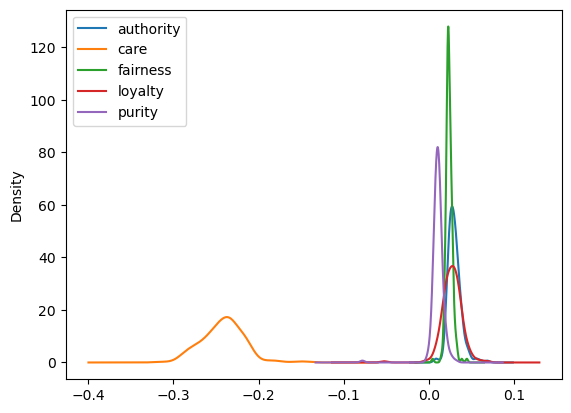

In [14]:
df.pivot_table(index = 'Datetime', values=['authority','care','fairness','loyalty','purity'],
               aggfunc={'authority':np.mean,'care':np.mean,'fairness':np.mean,'loyalty':np.mean,'purity':np.mean,}).plot.density()

array([<AxesSubplot:xlabel='Datetime'>, <AxesSubplot:xlabel='Datetime'>,
       <AxesSubplot:xlabel='Datetime'>, <AxesSubplot:xlabel='Datetime'>,
       <AxesSubplot:xlabel='Datetime'>], dtype=object)

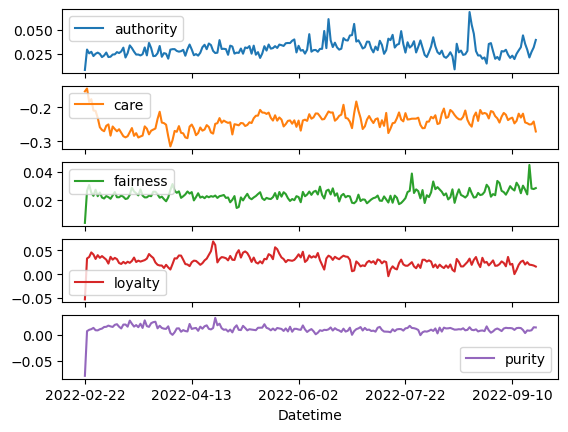

In [15]:
df.pivot_table(index = 'Datetime', values=['authority','care','fairness','loyalty','purity'],
               aggfunc={'authority':np.mean,'care':np.mean,'fairness':np.mean,'loyalty':np.mean,'purity':np.mean,}).plot.line(subplots=True)

In [16]:
cross_table = pd.crosstab(df['HorA'], df['care_cat'], margins=True)
cross_table

care_cat,Care,Harm,Mixed,Non,All
HorA,,,,,
0,115038,810638,160536,1493504,2579716
1,5155,70025,10615,65242,151037
All,120193,880663,171151,1558746,2730753


In [17]:
from scipy import stats
stat, p, dof, expected = stats.chi2_contingency(cross_table)
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.0
Dependent (reject H0)


In [18]:
cross_table = pd.crosstab(df['HorA'], df['authority_cat'], margins=True)
stat, p, dof, expected = stats.chi2_contingency(cross_table)
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 4.413706447809801e-261
Dependent (reject H0)


In [19]:
cross_table = pd.crosstab(df['HorA'], df['fairness_cat'], margins=True)
stat, p, dof, expected = stats.chi2_contingency(cross_table)
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.0
Dependent (reject H0)


In [20]:
cross_table = pd.crosstab(df['HorA'], df['purity_cat'], margins=True)
stat, p, dof, expected = stats.chi2_contingency(cross_table)
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.0
Dependent (reject H0)


In [21]:
cross_table = pd.crosstab(df['HorA'], df['loyalty_cat'], margins=True)
stat, p, dof, expected = stats.chi2_contingency(cross_table)
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.0
Dependent (reject H0)


In [27]:
df['30day_cut'] = df['30day_cut'].astype('category')

In [28]:
cat_columns = df.select_dtypes(['category']).columns
print(cat_columns)

Index(['30day_cut'], dtype='object')


In [29]:
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

In [13]:
df.head()

,Unnamed: 0,Datetime,Tweet_id,Tweet_content,Tweet_reply_count,Tweet_retweet_count,Tweet_like_count,Tweet_quote_count,Tweet_hashtags,Username,...,care_cat,fairness_cat,purity_cat,loyalty_cat,30day_cut,Tweet_content_clean,url_num,at_num,emoji_num,User_infuluence_score
0,0,2022-02-22,1496098801152512002,putins war ukraine russia crisis ukraina ...,0,0,1,0,"['PutinsWar', 'UkraineRussiaCrisis', 'Ukraina'...",anyidea,...,Harm,Non,Non,Non,0,"['putin', 'war', 'ukrain', 'russia', 'crisi', ...",1,0,0,1.155039
1,1,2022-02-22,1496099780912881665,Proud moment for indiaTwo young shining stars...,0,0,1,0,"['India', 'Kashmir', 'India', 'Dubai', 'COVID1...",AhmedFidous,...,Care,Non,Non,Non,0,"['proud', 'moment', 'indiatwo', 'young', 'shin...",1,0,0,0.273474
2,2,2022-02-22,1496103001903501319,Russia vs Ukraine War Update: Germany halts No...,1,0,1,0,"['Ukraine', 'UkraineRussiaCrisis', 'UkraineCon...",prime_scoop,...,Harm,Non,Non,Non,0,"['russia', 'vs', 'ukrain', 'war', 'updat', '',...",1,0,0,7.575000
3,3,2022-02-22,1496107122718695424,putins war :Interesting details on other terr...,0,0,1,0,"['PutinsWar', 'SatansSpeech', 'PutinSpeech', '...",anyidea,...,Harm,Non,Non,Non,0,"['putin', 'war', '', 'interest', 'detail', 'te...",1,0,0,1.155039
4,4,2022-02-22,1496107229929476105,"criminals in russia, iran, syria!are the w...",0,0,3,0,"['criminals', 'Russia', 'Iran', 'Syria', 'Cowa...",Basel_Saneeb,...,Non,Non,Degradation,Mixed,0,"['crimin', 'russia', '', 'iran', '', 'syria', ...",1,0,4,2.186667


In [31]:
df['30day_cut'].value_counts()

 0    788454
 1    511543
 2    382645
 3    285458
 4    254926
 5    232124
 6    164647
-1    110956
Name: 30day_cut, dtype: int64

In [40]:
df.columns

Index(['Datetime', 'Tweet_id', 'Tweet_content', 'Tweet_reply_count',
       'Tweet_retweet_count', 'Tweet_like_count', 'Tweet_quote_count',
       'Tweet_hashtags', 'Username', 'User_id', 'User_followers_count',
       'User_friends_count', 'User_statuses_count', 'User_favourites_count',
       'User_listed_count', 'User_media_count', 'HorA', 'care', 'fairness',
       'loyalty', 'authority', 'purity', 'authority_cat', 'care_cat',
       'fairness_cat', 'purity_cat', 'loyalty_cat', '30day_cut'],
      dtype='object')

In [44]:
df.loc[0].Tweet_hashtags

"['PutinsWar', 'UkraineRussiaCrisis', 'Ukraina', 'UkraineCrisis', 'Ukraine', 'VolodymyrZelensky', 'VladimirPutin']"

In [47]:
df.loc[2].Tweet_content

"Russia vs Ukraine War Update: Germany halts Nord stream 2 pipeline due to Russia's Actions Actions in Ukraine  ukraine  ukraine russia crisis  ukraine conflict  ukraina  russia  russia ukraine crisis  nord stream2 url"

In [13]:
ddf = df[df['30day_cut']>=0].pivot_table(index=['User_id','30day_cut'], 
                                         values=['care','fairness','purity','authority','loyalty','HorA','emoji_num','url_num','User_infuluence_score','User_followers_count','Tweet_retweet_count','Tweet_be_retweeted'], 
                                         aggfunc=np.mean)

In [14]:
ddf.head()

HorA  Tweet_be_retweeted  Tweet_retweet_count  \
User_id 30day_cut                                                      
1378    0          0.007168            0.159498             0.277778   
        1          0.004566            0.146119             0.178082   
        2          0.000000            0.132353             0.161765   
        3          0.000000            0.195652             0.260870   
        4          0.000000            0.138889             0.138889   

                   User_followers_count  User_infuluence_score  authority  \
User_id 30day_cut                                                           
1378    0                  15817.302867               1.055566   0.041622   
        1                  15826.968037               1.055897   0.025209   
        2                  15841.897059               1.062262   0.035638   
        3                  15851.695652               1.062225   0.092585   
        4                  15854.916667               1.062403   0.056713   

                       care  emoji_num  fairness   loyalty    purity   url_num  
User_id 30day_cut                                                               
1378    0         -0.411163   0.426523  0.017116  0.033132 -0.002748  0.283154  
        1         -0.622084   0.547945  0.012965  0.044747  0.019273  0.502283  
        2         -0.526144   0.352941  0.023284  0.061180 -0.017004  0.441176  
        3         -0.552907   0.260870  0.045290  0.122768 -0.010870  0.391304  
        4         -0.539043   0.277778  0.028935  0.019965  0.006944  0.361111

In [22]:
ddf.to_csv('H:/课程/毕业论文/Panel_data_processed.csv')

In [29]:
!pip install --upgrade statsmodels

     ---------------------------------------- 9.2/9.2 MB 3.9 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.13.2
    Uninstalling statsmodels-0.13.2:
      Successfully uninstalled statsmodels-0.13.2


In [24]:
ddf.head()

HorA  Tweet_be_retweeted  Tweet_retweet_count  \
User_id 30day_cut                                                      
1378    0          0.007168            0.159498             0.277778   
        1          0.004566            0.146119             0.178082   
        2          0.000000            0.132353             0.161765   
        3          0.000000            0.195652             0.260870   
        4          0.000000            0.138889             0.138889   

                   User_followers_count  User_infuluence_score  authority  \
User_id 30day_cut                                                           
1378    0                  15817.302867               1.055566   0.041622   
        1                  15826.968037               1.055897   0.025209   
        2                  15841.897059               1.062262   0.035638   
        3                  15851.695652               1.062225   0.092585   
        4                  15854.916667               1.062403   0.056713   

                       care  emoji_num  fairness   loyalty    purity   url_num  
User_id 30day_cut                                                               
1378    0         -0.411163   0.426523  0.017116  0.033132 -0.002748  0.283154  
        1         -0.622084   0.547945  0.012965  0.044747  0.019273  0.502283  
        2         -0.526144   0.352941  0.023284  0.061180 -0.017004  0.441176  
        3         -0.552907   0.260870  0.045290  0.122768 -0.010870  0.391304  
        4         -0.539043   0.277778  0.028935  0.019965  0.006944  0.361111

<AxesSubplot:ylabel='Frequency'>

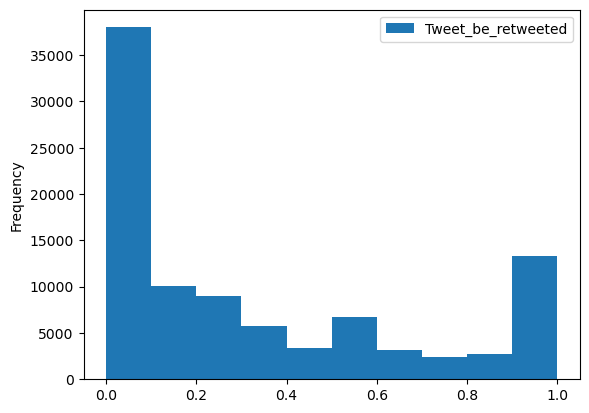

In [32]:
ddf.plot.hist(x='User_followers_count',y='Tweet_be_retweeted')

In [36]:
pd.set_option('display.float_format',lambda x:'%.2f' %x)
ddf.describe()

,HorA,Tweet_be_retweeted,Tweet_retweet_count,User_followers_count,User_infuluence_score,authority,care,emoji_num,fairness,loyalty,purity,url_num
count,94472.00,94472.00,94472.00,94472.00,94472.00,94472.00,94472.00,94472.00,94472.00,94472.00,94472.00,94472.00
mean,0.05,0.32,5.16,27136.46,362.22,0.03,-0.20,0.92,0.03,0.03,0.01,0.48
std,0.14,0.36,57.52,349359.30,11337.39,0.10,0.27,2.58,0.08,0.13,0.11,0.50
min,0.00,0.00,0.00,0.00,0.00,-0.81,-1.00,0.00,-0.46,-1.00,-0.90,0.00
25%,0.00,0.00,0.00,294.39,0.48,0.00,-0.35,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.18,0.25,1153.77,0.99,0.00,-0.16,0.00,0.00,0.00,0.00,0.33
75%,0.04,0.54,1.09,4281.26,3.32,0.04,0.00,0.82,0.02,0.04,0.01,0.92
max,1.00,1.00,6593.67,17675737.54,1174682.14,0.95,0.95,125.14,1.00,0.97,1.00,5.00


In [17]:
import statsmodels.api as sm

# 读取数据
data = ddf

# 拆分数据集
X = data[['care', 'fairness', 'authority', 'purity', 'loyalty']]
y = data['HorA']

# 添加截距项
X = sm.add_constant(X)

# 拟合线性回归模型
ols_model = sm.OLS(y, X)
result = ols_model.fit()

# 打印结果
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   HorA   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     431.4
Date:                Wed, 19 Apr 2023   Prob (F-statistic):               0.00
Time:                        12:14:47   Log-Likelihood:                 54851.
No. Observations:               94472   AIC:                        -1.097e+05
Df Residuals:                   94466   BIC:                        -1.096e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0444      0.001     73.604      0.0

In [32]:
ddf.describe()

,HorA,Tweet_be_retweeted,Tweet_retweet_count,User_followers_count,User_infuluence_score,authority,care,emoji_num,fairness,loyalty,purity,url_num,User_followers_count_log
count,94472.000000,94472.000000,94472.000000,9.447200e+04,9.447200e+04,94472.000000,94472.000000,94472.000000,94472.000000,94472.000000,94472.000000,94472.000000,94472.000000
mean,0.054366,0.322008,5.159436,2.713646e+04,3.622158e+02,0.029781,-0.204346,0.919144,0.026175,0.028979,0.013584,0.478405,7.079374
std,0.136935,0.355062,57.516253,3.493593e+05,1.133739e+04,0.104617,0.265016,2.575024,0.078949,0.125573,0.105394,0.498710,2.193749
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,-0.812500,-1.000000,0.000000,-0.458333,-1.000000,-0.900000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,2.943943e+02,4.818726e-01,0.000000,-0.349419,0.000000,0.000000,0.000000,0.000000,0.000000,5.688311
50%,0.000000,0.181818,0.250000,1.153768e+03,9.940709e-01,0.000000,-0.155548,0.000000,0.000000,0.000000,0.000000,0.333333,7.051655
75%,0.038462,0.542857,1.090909,4.281260e+03,3.317438e+00,0.040000,0.000000,0.823529,0.020798,0.042208,0.008839,0.919650,8.362236
max,1.000000,1.000000,6593.666667,1.767574e+07,1.174682e+06,0.950000,0.950000,125.142857,1.000000,0.975000,1.000000,5.000000,16.687704


In [19]:
#自变量之间的共线性检验
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 将需要检测的变量放入一个列表中
variables = ['care', 'fairness', 'authority', 'purity', 'loyalty','emoji_num','url_num','User_infuluence_score']

# 创建一个新的DataFrame，只包含需要检测的变量
new_df = ddf[variables]

# 计算VIF值
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(new_df.values, i) for i in range(new_df.shape[1])]
vif["features"] = new_df.columns

# 输出结果
print(vif)

   VIF Factor               features
0    1.277537                   care
1    1.056010               fairness
2    1.071425              authority
3    1.011528                 purity
4    1.082786                loyalty
5    1.091534              emoji_num
6    1.380178                url_num
7    1.001849  User_infuluence_score


五个道德维度之间不存在多重共线性问题

In [31]:
ddf.head()

HorA  Tweet_be_retweeted  Tweet_retweet_count  \
User_id 30day_cut                                                      
1378    0          0.007168            0.159498             0.277778   
        1          0.004566            0.146119             0.178082   
        2          0.000000            0.132353             0.161765   
        3          0.000000            0.195652             0.260870   
        4          0.000000            0.138889             0.138889   

                   User_followers_count  User_infuluence_score  authority  \
User_id 30day_cut                                                           
1378    0                  15817.302867               1.055566   0.041622   
        1                  15826.968037               1.055897   0.025209   
        2                  15841.897059               1.062262   0.035638   
        3                  15851.695652               1.062225   0.092585   
        4                  15854.916667               1.062403   0.056713   

                       care  emoji_num  fairness   loyalty    purity  \
User_id 30day_cut                                                      
1378    0         -0.411163   0.426523  0.017116  0.033132 -0.002748   
        1         -0.622084   0.547945  0.012965  0.044747  0.019273   
        2         -0.526144   0.352941  0.023284  0.061180 -0.017004   
        3         -0.552907   0.260870  0.045290  0.122768 -0.010870   
        4         -0.539043   0.277778  0.028935  0.019965  0.006944   

                    url_num  User_followers_count_log  
User_id 30day_cut                                      
1378    0          0.283154                  9.668923  
        1          0.502283                  9.669534  
        2          0.441176                  9.670477  
        3          0.391304                  9.671095  
        4          0.361111                  9.671298

In [38]:
from linearmodels import PanelOLS
reg_fe = PanelOLS.from_formula('HorA ~ care + fairness + authority + purity + loyalty + emoji_num + url_num +User_infuluence_score+EntityEffects +TimeEffects', data=ddf)
results_fe = reg_fe.fit()
print(results_fe)

                          PanelOLS Estimation Summary                           
Dep. Variable:                   HorA   R-squared:                        0.0073
Estimator:                   PanelOLS   R-squared (Between):              0.0009
No. Observations:               94472   R-squared (Within):               0.0073
Date:                Mon, Apr 24 2023   R-squared (Overall):              0.0041
Time:                        14:53:07   Log-likelihood                  8.01e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      74.155
Entities:                       13496   P-value                           0.0000
Avg Obs:                       7.0000   Distribution:                 F(8,80962)
Min Obs:                       7.0000                                           
Max Obs:                       7.0000   F-statistic (robust):             74.155
                            

In [37]:
from linearmodels import PanelOLS
reg_fe = PanelOLS.from_formula('HorA ~ care + fairness + authority + purity + loyalty +EntityEffects+TimeEffects', data=ddf)
results_fe = reg_fe.fit()
print(results_fe)

                          PanelOLS Estimation Summary                           
Dep. Variable:                   HorA   R-squared:                        0.0051
Estimator:                   PanelOLS   R-squared (Between):              0.0824
No. Observations:               94472   R-squared (Within):               0.0051
Date:                Mon, Apr 24 2023   R-squared (Overall):              0.0438
Time:                        14:52:53   Log-likelihood                     8e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      82.325
Entities:                       13496   P-value                           0.0000
Avg Obs:                       7.0000   Distribution:                 F(5,80965)
Min Obs:                       7.0000                                           
Max Obs:                       7.0000   F-statistic (robust):             82.325
                            

In [27]:
ddf['User_followers_count_log'] = ddf['User_followers_count'].apply(lambda x:np.log(x+1))

In [39]:
from linearmodels import PanelOLS
reg_fe = PanelOLS.from_formula('Tweet_be_retweeted ~ care*HorA + fairness*HorA + authority*HorA + purity*HorA + loyalty*HorA + User_followers_count_log*HorA + EntityEffects+TimeEffects', data=ddf)
results_fe = reg_fe.fit()
print(results_fe)

                          PanelOLS Estimation Summary                           
Dep. Variable:     Tweet_be_retweeted   R-squared:                        0.0008
Estimator:                   PanelOLS   R-squared (Between):             -2.6627
No. Observations:               94472   R-squared (Within):               0.0006
Date:                Mon, Apr 24 2023   R-squared (Overall):             -2.2855
Time:                        15:21:05   Log-likelihood                 2.782e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      4.7662
Entities:                       13496   P-value                           0.0000
Avg Obs:                       7.0000   Distribution:                F(13,80957)
Min Obs:                       7.0000                                           
Max Obs:                       7.0000   F-statistic (robust):             4.7662
                            

In [40]:
from scipy import stats
import statsmodels.formula.api as smf
formula = 'Tweet_be_retweeted ~ care*HorA + fairness*HorA + authority*HorA + purity*HorA + loyalty*HorA + User_followers_count_log*HorA'
result = smf.ols(formula, data=ddf).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Tweet_be_retweeted   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     3040.
Date:                Mon, 24 Apr 2023   Prob (F-statistic):               0.00
Time:                        16:32:22   Log-Likelihood:                -19719.
No. Observations:               94472   AIC:                         3.947e+04
Df Residuals:                   94458   BIC:                         3.960e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -0.3119      0.004    -83.448      0.000      -0.319      -0.305
care                             -0.0277      0.004     -7.097      0.000      -0.035      -0.020
HorA                              0.3233      0.023     13.902      0.000       0.278       0.369
care:HorA                        -0.0838      0.020     -4.142      0.000      -0.123      -0.044
fairness                         -0.0139      0.013     -1.069      0.285      -0.039       0.012
fairness:HorA                    -0.0010      0.063     -0.016      0.987      -0.124       0.122
authority                         0.0328      0.010      3.325      0.001       0.013       0.052
authority:HorA                   -0.1104      0.045     -2.445      0.014      -0.199      -0.022
purity                            0.0427      0.010      4.315      0.000       0.023       0.062
purity:HorA                      -0.0356      0.040     -0.894      0.372      -0.114       0.043
loyalty                           0.1926      0.008     23.350      0.000       0.176       0.209
loyalty:HorA                     -0.2911      0.042     -7.012      0.000      -0.373      -0.210
User_followers_count_log          0.0883      0.000    185.002      0.000       0.087       0.089
User_followers_count_log:HorA    -0.0669      0.003    -20.074      0.000      -0.073      -0.060
==============================================================================
Omnibus:                     5385.411   Durbin-Watson:                   0.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6368.499
Skew:                           0.636   Prob(JB):                         0.00
Kurtosis:                       3.037   Cond. No.                         486.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
df.head()

,Datetime,Tweet_id,Tweet_content,Tweet_reply_count,Tweet_retweet_count,Tweet_like_count,Tweet_quote_count,Tweet_hashtags,Username,User_id,...,fairness,loyalty,authority,purity,authority_cat,care_cat,fairness_cat,purity_cat,loyalty_cat,30day_cut
0,2022-02-22,1496098801152512002,putins war ukraine russia crisis ukraina ...,0,0,1,0,"['PutinsWar', 'UkraineRussiaCrisis', 'Ukraina'...",anyidea,23024287,...,0.0,0.0000,0.0,0.0,Non,Harm,Non,Non,Non,0
1,2022-02-22,1496099780912881665,Proud moment for indiaTwo young shining stars...,0,0,1,0,"['India', 'Kashmir', 'India', 'Dubai', 'COVID1...",AhmedFidous,1334012207286325249,...,0.0,0.0000,0.0,0.0,Non,Care,Non,Non,Non,0
2,2022-02-22,1496103001903501319,Russia vs Ukraine War Update: Germany halts No...,1,0,1,0,"['Ukraine', 'UkraineRussiaCrisis', 'UkraineCon...",prime_scoop,1486283164846747649,...,0.0,0.0000,0.0,0.0,Non,Harm,Non,Non,Non,0
3,2022-02-22,1496107122718695424,putins war :Interesting details on other terr...,0,0,1,0,"['PutinsWar', 'SatansSpeech', 'PutinSpeech', '...",anyidea,23024287,...,0.0,0.0000,0.0,0.0,Non,Harm,Non,Non,Non,0
4,2022-02-22,1496107229929476105,"criminals in russia, iran, syria!are the w...",0,0,3,0,"['criminals', 'Russia', 'Iran', 'Syria', 'Cowa...",Basel_Saneeb,1588526876,...,0.0,-0.4375,0.0,-0.5,Non,Non,Non,Degradation,Mixed,0
